<a href="https://colab.research.google.com/github/sivasamy1/Machine_learning_research/blob/main/Stock_price_prediction_linear_regression_shuffle_off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [366]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [367]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, shuffle=False) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [368]:
df = pd.read_csv("Bitcoin_8_30_2024-8_30_2025_historical_data_coinmarketcap.csv", delimiter=';')
df["timeOpen"] = pd.to_datetime(df["timeOpen"], utc=True)
df["timeClose"] = pd.to_datetime(df["timeClose"], utc=True)
df["timeHigh"] = pd.to_datetime(df["timeHigh"], utc=True)
df["timeLow"] = pd.to_datetime(df["timeLow"], utc=True)
df["timestamp"] = pd.to_datetime(df["timestamp"], utc=True)
df = df.sort_values(by="timeOpen", ascending=True).reset_index(drop=True)
# df = df[df.name == "2781"]

In [369]:
print(tabulate(df, headers='keys', tablefmt='github'))

|     | timeOpen                  | timeClose                        | timeHigh                  | timeLow                   |   name |     open |     high |      low |    close |      volume |   marketCap | timestamp                        |
|-----|---------------------------|----------------------------------|---------------------------|---------------------------|--------|----------|----------|----------|----------|-------------|-------------|----------------------------------|
|   0 | 2024-08-31 00:00:00+00:00 | 2024-08-31 23:59:59.999000+00:00 | 2024-08-31 00:34:00+00:00 | 2024-08-31 17:52:00+00:00 |   2781 |  59117.5 |  59432.6 |  58768.8 |  58969.9 | 1.24035e+10 | 1.16452e+12 | 2024-08-31 23:59:59.999000+00:00 |
|   1 | 2024-09-01 00:00:00+00:00 | 2024-09-01 23:59:59.999000+00:00 | 2024-09-01 00:17:00+00:00 | 2024-09-01 23:19:00+00:00 |   2781 |  58969.8 |  59062.1 |  57217.8 |  57325.5 | 2.45924e+10 | 1.13211e+12 | 2024-09-01 23:59:59.999000+00:00 |
|   2 | 2024-09-02 00:00:00+

In [370]:
forecast_col = 'open'
forecast_out = 10
test_size = 0.5099999999999998

In [371]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method where the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model

LinearRegression()

In [372]:
score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.8223861397051668, 'forecast_set': array([110988.3608929 , 112245.51468095, 110645.95799129, 114495.27056872,
       113210.92384033, 111534.47595695, 108640.273831  , 110091.89771869,
       109591.12733578, 110747.37809316])}


In [373]:
forecast_col1 = 'close'
forecast_out1 = 10
test_size1 = 0.5099999999999998

In [374]:
X_train1, X_test1, Y_train1, Y_test1 , X_lately1 =prepare_data(df,forecast_col1,forecast_out1,test_size1); #calling the method where the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train1,Y_train1) #training the linear regression model

LinearRegression()

In [375]:
score1=learner.score(X_test1,Y_test1)#testing the linear regression model
forecast1= learner.predict(X_lately1) #set that will contain the forecasted data
response['test_score1']=score1
response['forecast_set1']=forecast1

print(response)

{'test_score': 0.8223861397051668, 'forecast_set': array([110988.3608929 , 112245.51468095, 110645.95799129, 114495.27056872,
       113210.92384033, 111534.47595695, 108640.273831  , 110091.89771869,
       109591.12733578, 110747.37809316]), 'test_score1': 0.8220008030433221, 'forecast_set1': array([112033.15716119, 110433.35469237, 114274.0427999 , 112981.10933986,
       111329.42105998, 108455.12385383, 109901.98309338, 109401.45475876,
       110541.78433712, 106977.91182558])}


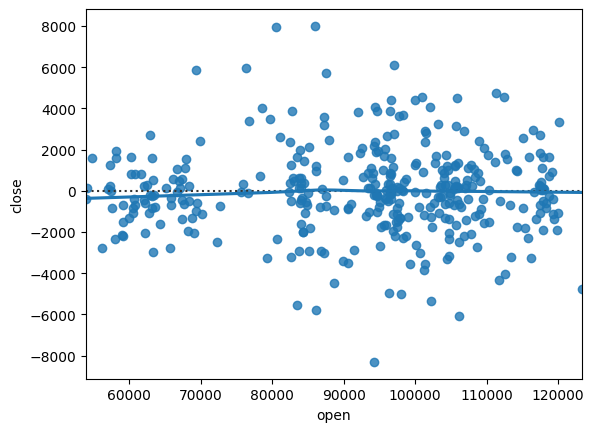

In [376]:
sns.residplot(x='open', y='close', data=df, lowess = True)
plt.xlabel("open")
plt.ylabel("close")
plt.show()

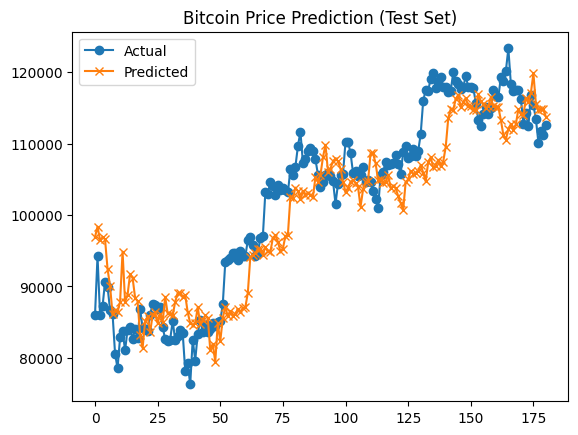

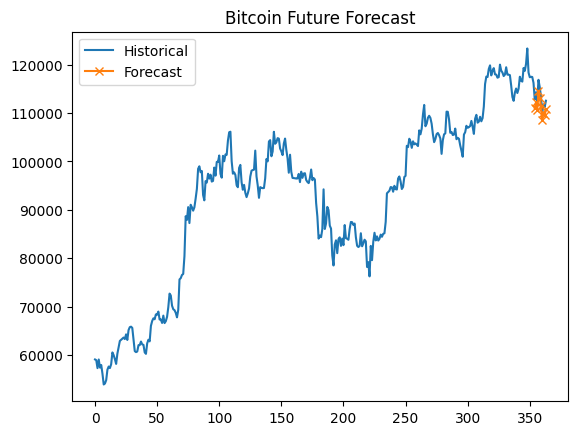

In [377]:
import matplotlib.pyplot as plt

# Plot actual vs predicted for test set
plt.plot(Y_test, label="Actual", marker='o')
plt.plot(learner.predict(X_test), label="Predicted", marker='x')
plt.legend()
plt.title("Bitcoin Price Prediction (Test Set)")
plt.show()

# Plot forecast for future dates
future_index = df.index[-forecast_out:]
plt.plot(df[forecast_col].values, label="Historical")
plt.plot(future_index, forecast, label="Forecast", marker='x')
plt.legend()
plt.title("Bitcoin Future Forecast")
plt.show()


In [378]:
from sklearn.metrics import mean_squared_error
import numpy as np

results = []

for ts in np.arange(0.1, 0.99, 0.01):
    X_train, X_test, y_train, y_test, X_lately = prepare_data(
        df, forecast_col, forecast_out, ts
    )

    # Fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append((ts, r2, rmse))

# Convert to DataFrame for easy view
results_df = pd.DataFrame(results, columns=["test_size", "R2_score", "RMSE"])
print(tabulate(results_df, headers='keys', tablefmt='github'))

|    |   test_size |    R2_score |     RMSE |
|----|-------------|-------------|----------|
|  0 |        0.1  |  -1.05958   |  4054.57 |
|  1 |        0.11 |  -0.923197  |  3914.85 |
|  2 |        0.12 |  -1.55963   |  4403.97 |
|  3 |        0.13 |  -2.66911   |  5227.76 |
|  4 |        0.14 |  -3.65991   |  5727.08 |
|  5 |        0.15 |  -2.07731   |  5592.55 |
|  6 |        0.16 |  -1.4454    |  5518.08 |
|  7 |        0.17 |  -0.952348  |  5563.69 |
|  8 |        0.18 |  -0.671056  |  5486.69 |
|  9 |        0.19 |  -0.267598  |  5355.23 |
| 10 |        0.2  |  -0.0542946 |  5281.17 |
| 11 |        0.21 |   0.0578394 |  5188.16 |
| 12 |        0.22 |   0.119066  |  5102.23 |
| 13 |        0.23 |   0.0841979 |  5164.45 |
| 14 |        0.24 |   0.164416  |  5084.29 |
| 15 |        0.25 |   0.222767  |  4964.31 |
| 16 |        0.26 |   0.265507  |  4868.38 |
| 17 |        0.27 |   0.216505  |  4967.25 |
| 18 |        0.28 |   0.14083   |  5130.34 |
| 19 |        0.29 |   0.137103  |

/tmp/ipython-input-1466197727.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


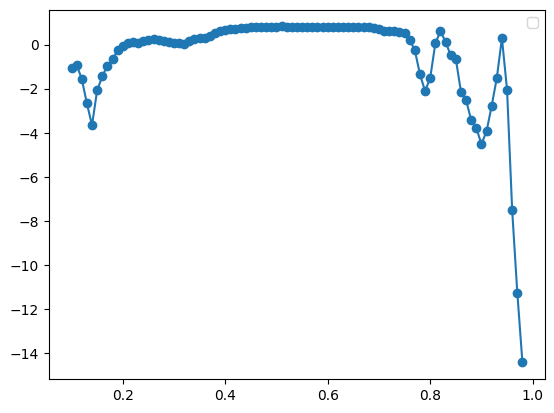

In [379]:
plt.plot(results_df["test_size"], results_df["R2_score"], marker='o')
plt.legend()
plt.show()

In [380]:
max_idx = results_df["R2_score"].idxmax()
results_df.loc[max_idx, "test_size"]

np.float64(0.5099999999999998)

In [381]:
 results_df.loc[max_idx, "R2_score"]

np.float64(0.8223861397051668)